# prepare dataset

In [ ]:
# load packages and dataset 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep= ';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep= ';')

# check and transform data types in the dataset
red_wine.astype('int64').dtypes
white_wine.astype('int64').dtypes

# create a new variable 'wine_type'
red_wine['wine_type'] = 'red'

# bucket wine quality scores into qualitative quality labels
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])
red_wine['quality_label'].dtype

# create a new variable 'wine_type'
white_wine['wine_type'] = 'white'

# bucket wine quality scores into qualitative quality labels
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

# combine two dataframe (red_wine) & (white_wine)
wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

# in case there is missing information: wines['wine_type'] = wines['wine_type'].replace(np.nan, 'red')

In [ ]:
# print first 10 records
wines.head(10)

In [ ]:
# print last 10 records
wines.tail(10)

# Figures in the presentation - 2021-02-12

## Figure1.1 - the counts of each factor in the dataset

In [ ]:
# trnasform dataframe to use each factor (column) as categorical variables

# resetting index before melting to save the current index in 'index' column...
my_df = wines.reset_index().melt(['wine_type', 'quality','quality_label'], var_name='key',  value_name='vals')
#my_df = my_df[6:72]

# remove rows with index as key values: 
# first, get names of indexes for which column 'key' has value 'index' 
index_names = my_df[my_df['key'] == 'index'].index 
# second, drop these row indexes from dataFrame 
my_df.drop(index_names, inplace = True) 
my_df

<Figure size 432x288 with 0 Axes>

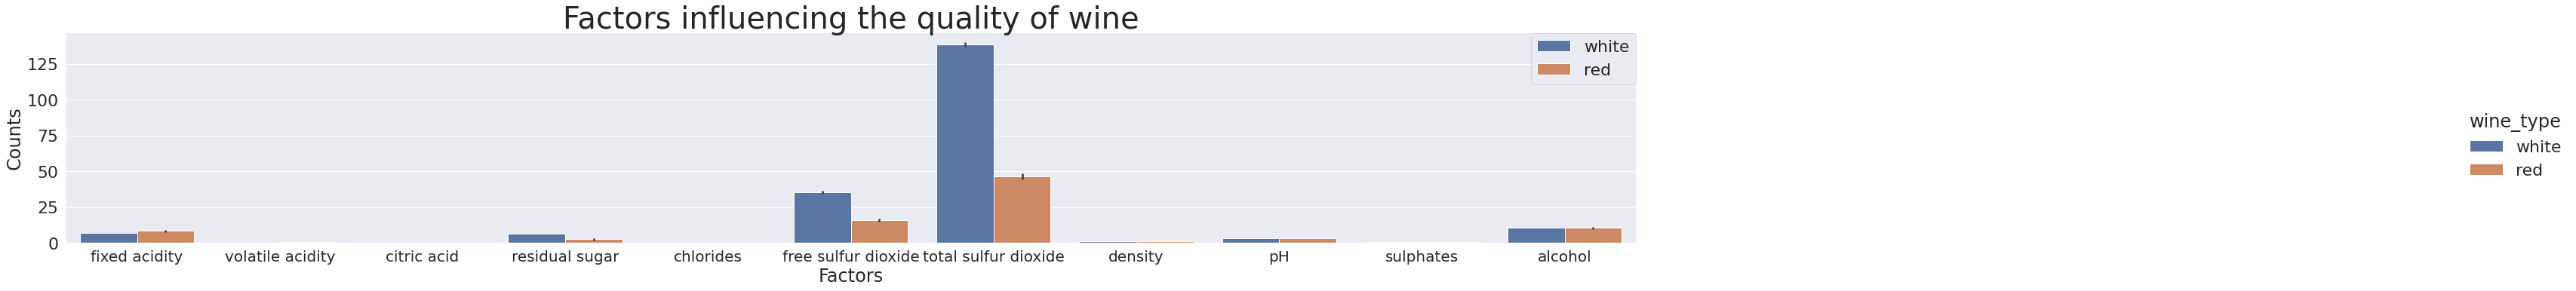

In [ ]:
fig = plt.gcf()
sns.set(font_scale=2)

#my_df['vals'] = my_df['vals'].astype('int64')
#g = sns.catplot(x="key", y="vals", hue="wine_type", data=my_df, kind="violin") #it works but too narrow
#g = sns.catplot(x="key", col="wine_type", data=my_df, kind="count", height=6, aspect=.8)
g = sns.catplot(x="key", y="vals", hue='wine_type', data=my_df, kind = "bar") #bar or box

# Change seaborn plot size - #g.fig.set_size_inches(24, 8)
g.fig.set_figwidth(60)
#g.fig.set_figheight(15)

plt.ylabel("Counts", size=24)
plt.xlabel("Factors", size=24)
_, xlabels = plt.xticks()
g.set_xticklabels(xlabels, size=20)
plt.title("Factors influencing the quality of wine", size=40)
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0)
plt.savefig("fig_1_general.png",format='png',dpi=300)
plt.show();

## Figure 1.2 - the proportion of quality label in red and white wine (pie chart)

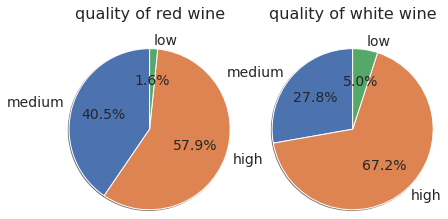

In [ ]:
#groupby the data by wine quality (red wine and white wine)=================================================================
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(h_pad=10)
pie_labels = list(set(wines["quality_label"].values))

pie_value_red = wines[wines['wine_type'] == 'red'].groupby("quality_label")["quality"].sum()
ax[0].pie(pie_value_red, labels=pie_labels, autopct='%1.1f%%', shadow=True,radius=2.0, textprops={'fontsize': 14}, startangle=90)
#define subplot titles
ax[0].set_title('quality of red wine', size = 16, pad=60) # plt.subplots_adjust(top=0.8) 


pie_value_white = wines[wines['wine_type'] == 'white'].groupby("quality_label")["quality"].sum()
ax[1].pie(pie_value_white, labels=pie_labels, autopct='%1.1f%%', shadow=True,radius=2.0, textprops={'fontsize': 14}, startangle=90)
#define subplot titles
ax[1].set_title('quality of white wine', size = 16, pad=60)

plt.show()


> From this plot, we cannot know which factor has a stronger/weaker impact on the quality of the wine, because each factor has a different range of values and we do not know how the effect of these factors interact.

> So we first check the correlation between these values to find the factors highly co-related to the _quality_.

## Figure 2 - correlation matrix

In [ ]:
#correlation - run the same code for red wine ()

# taking all rows but only columns with numeric values
wine_white = wines[wines['wine_type'] == 'white']
wine_white.drop(['quality_label','wine_type'], inplace=True, axis=1)

correlation_mat = wine_white.corr()

#sns.heatmap(correlation_mat, annot = True)

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(correlation_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(correlation_mat, mask=mask, cmap=cmap, 
        square=True, annot=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.xticks(rotation=45)
plt.savefig("wine-fig-corr.png", format='png',dpi=300)

## Figure 3,4,5,6 - the relationship between factors

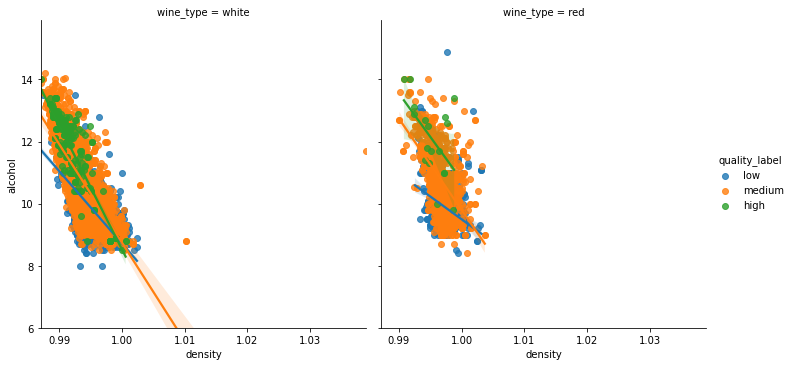

In [ ]:
# the relationship between density and alcohol in red and white wine
g = sns.lmplot(
    data=wines,
    x="density", y='alcohol', hue="quality_label",
    height=5, col = 'wine_type'
)
g.set(ylim=(6, None));
plt.savefig("reg-density-alcohol.png", format='png',dpi=300)

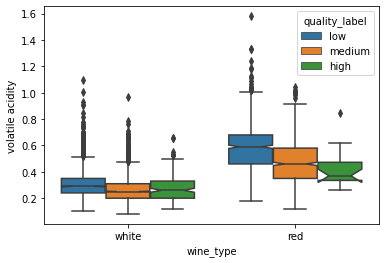

In [ ]:
# the relationship between volatiile acidity and wine quality in red and white wine
import seaborn as sns
data = wines
sns.boxplot(data = data , x = 'wine_type' , y = 'volatile acidity' , hue = 'quality_label' , notch = True )
plt.savefig("wine-fig-corr.png", format='png',dpi=300)

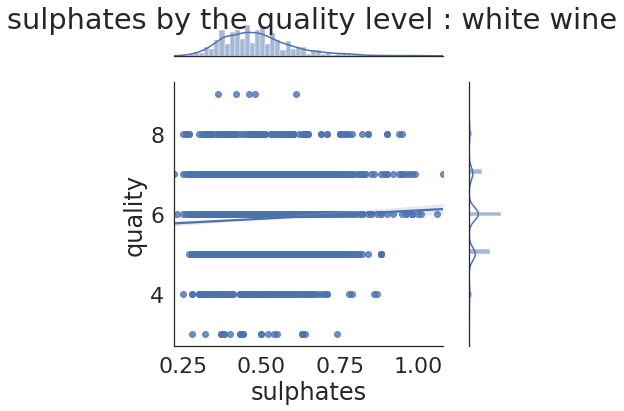

In [ ]:
# the relationship between sulphates and quality (white wine)
wine_white = wines[wines['wine_type'] == 'white']
fig_acid_white = sns.jointplot(data=wine_white, x="sulphates", y="quality", kind="reg") #hue="quality_label",alpha=.5
fig_acid_white.fig.suptitle("sulphates by the quality level : white wine")
fig_acid_white.fig.tight_layout()

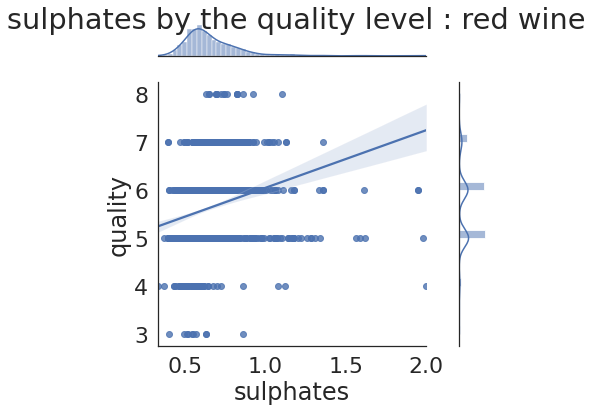

In [ ]:
# the relationship between "sulphates" and quality (red wine)
wine_red = wines[wines['wine_type'] == 'red']
fig_acid_red = sns.jointplot(data=wine_red, x="sulphates", y="quality", kind="reg") #hue="quality_label",alpha=.5
fig_acid_red.fig.suptitle("sulphates by the quality level : red wine")
fig_acid_red.fig.tight_layout()

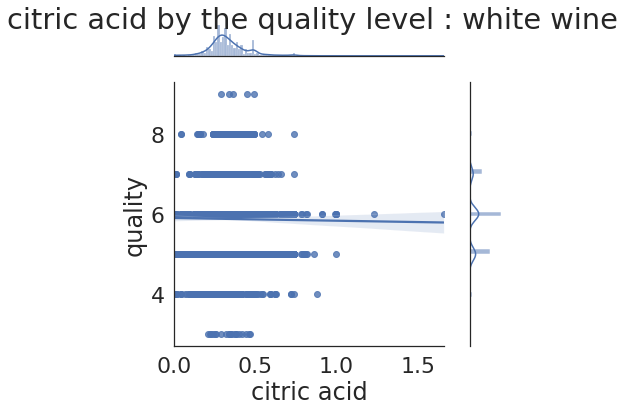

In [ ]:
# the relationship between "citric acid" and quality in white wine
wine_white = wines[wines['wine_type'] == 'white']
fig_acid_white = sns.jointplot(data=wine_white, x="citric acid", y="quality", kind="reg") #hue="quality_label",alpha=.5
fig_acid_white.fig.suptitle("citric acid by the quality level : white wine")
fig_acid_white.fig.tight_layout()

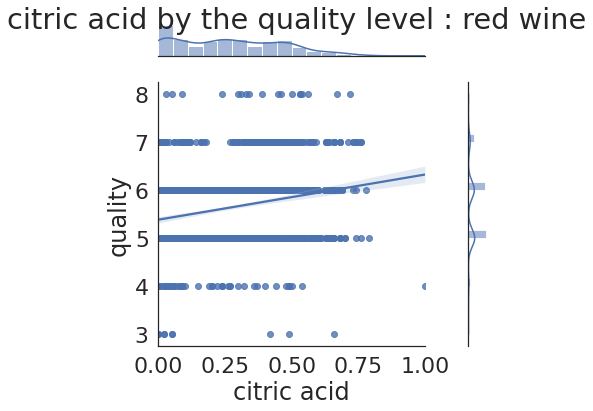

In [ ]:
# the relationship between "citric acid" and quality in red wine
wine_red = wines[wines['wine_type'] == 'red']
fig_acid_red = sns.jointplot(data=wine_red, x="citric acid", y="quality", kind="reg") #hue="quality_label",alpha=.5
fig_acid_red.fig.suptitle("citric acid by the quality level : red wine")
fig_acid_red.fig.tight_layout()